**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Marcos Eduardo García Ortiz
*   MATRÍCULA: A01276213

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Maestria/Primer Trimstre/Ciencia de datos/Actividades/Actividad 8"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
insurance_df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [ ]:
def get_missing_porcentage(cars_df):
  porcentage_list = cars_df.isnull().sum()/len(cars_df)*100

  for columna, valor in porcentage_list.items():
      print(f"{columna}: {valor:.3f} %")

get_missing_porcentage(insurance_df)

age: 0.000 %
sex: 0.000 %
bmi: 0.000 %
children: 0.000 %
smoker: 0.000 %
region: 0.000 %
charges: 0.000 %


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

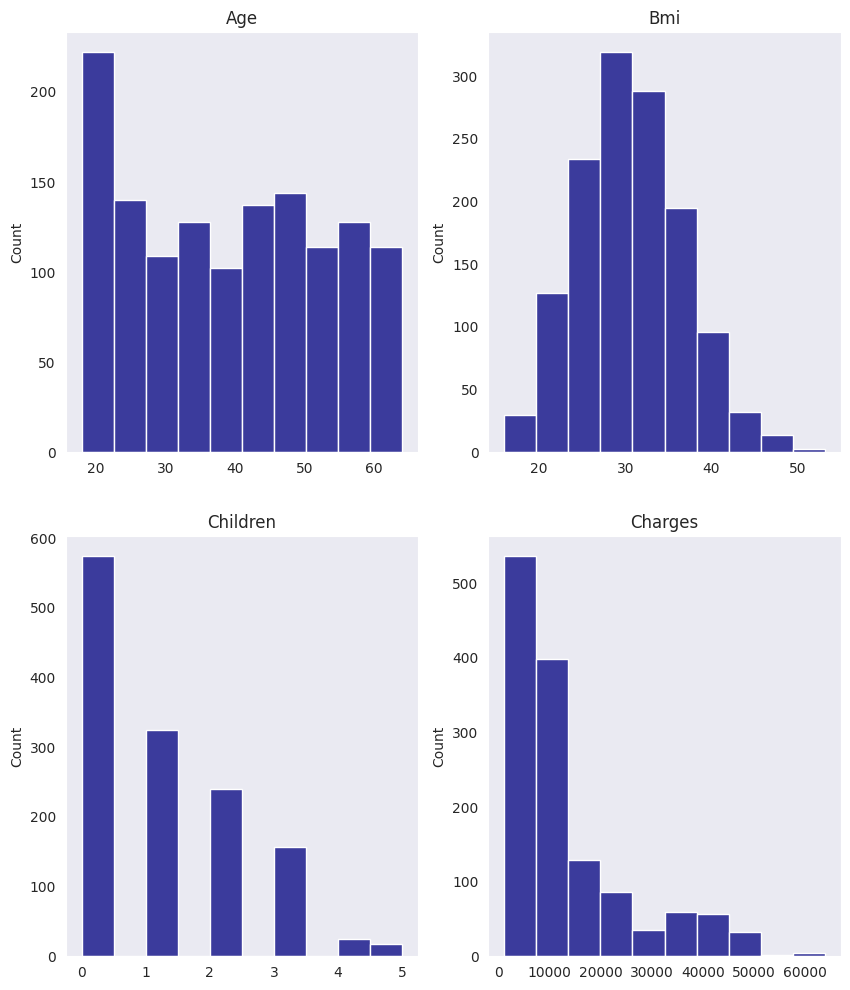

In [ ]:
# Tipo de Datos Cuantitativos
sns.set_style('dark')
fig, axes = plt.subplots(2,2, figsize=(10,12))
axes = axes.ravel()
#plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(insurance_df.select_dtypes(include=np.number).columns.tolist(), axes):
  sns.histplot(x=insurance_df[colname],ax=ax,bins=10, color='navy')
  ax.set(title=f'{(colname).capitalize()}', xlabel=None)

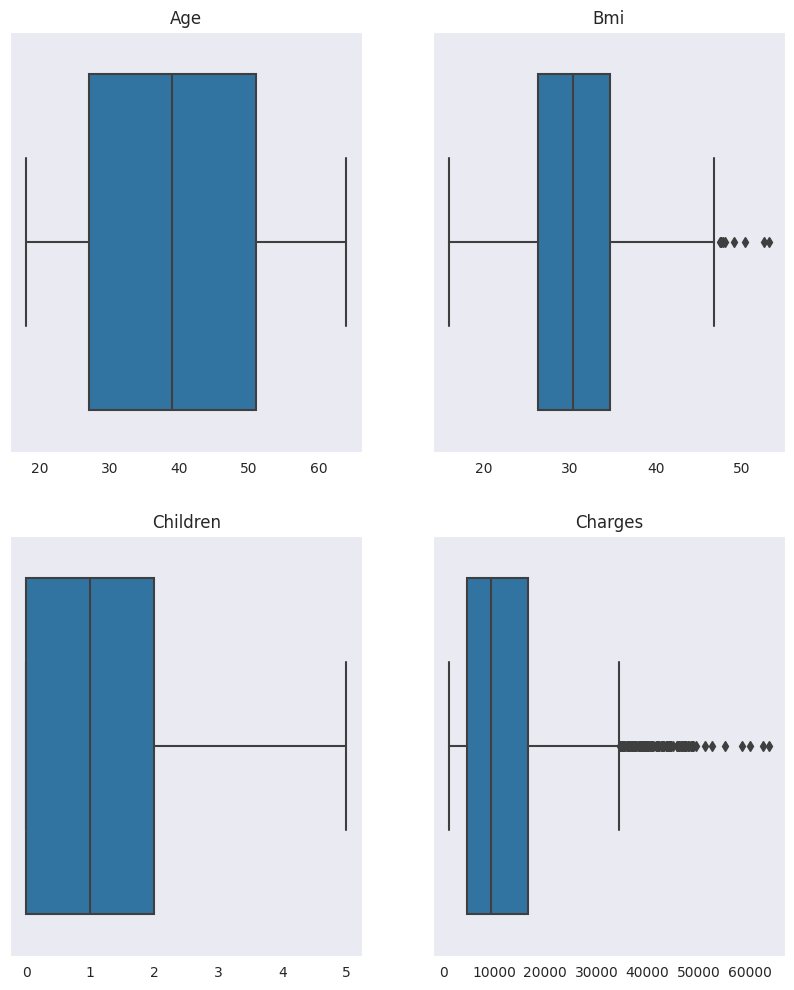

In [ ]:
# Tipo de Datos Cuantitativos
sns.set_style('dark')
fig, axes = plt.subplots(2,2, figsize=(10,12))
axes = axes.ravel()
#plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(insurance_df.select_dtypes(include=np.number).columns.tolist(), axes):
  sns.boxplot(x=insurance_df[colname],ax=ax)
  ax.set(title=f'{(colname).capitalize()}', xlabel=None)

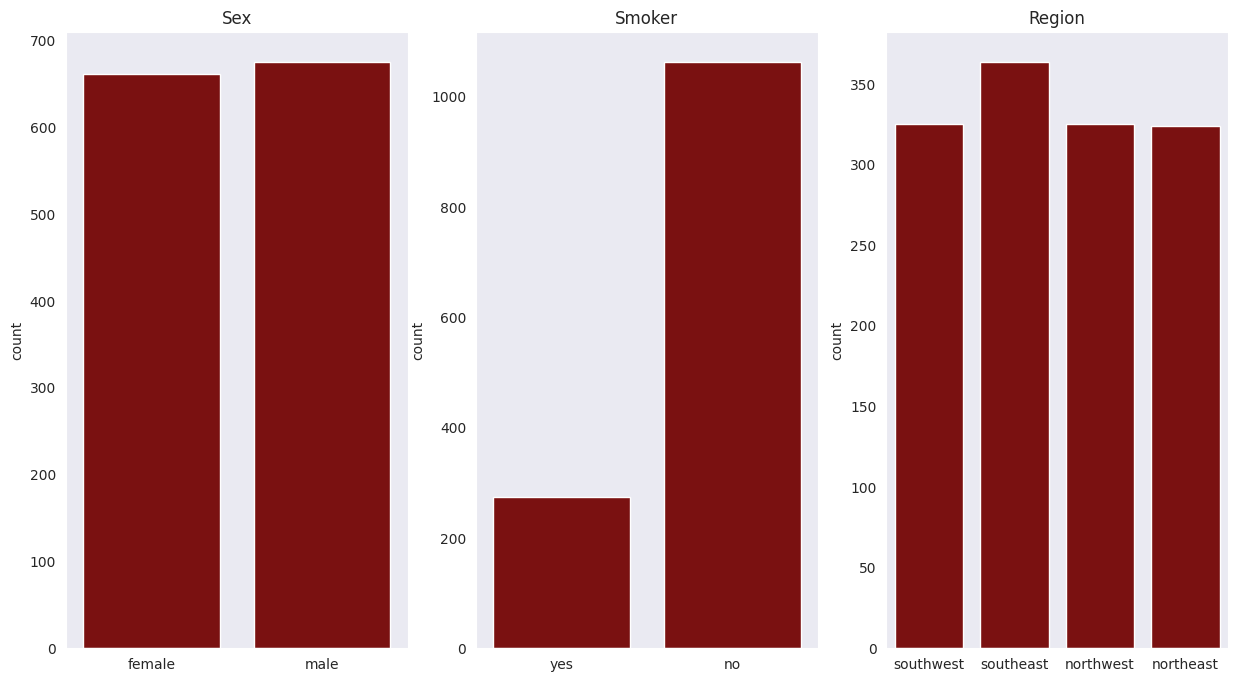

In [ ]:
# Tipo de Datos Cuantitativos
sns.set_style('dark')
fig, axes = plt.subplots(1,3, figsize=(15,8))
axes = axes.ravel()

#plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(insurance_df.select_dtypes(include='object').columns.tolist(), axes):
  sns.countplot(x=insurance_df[colname],ax=ax, color='darkred')
  ax.set(title=f'{(colname).capitalize()}', xlabel=None)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

Text(0.5, 1.0, 'Diferencias entre las primas de seguro por sexo')

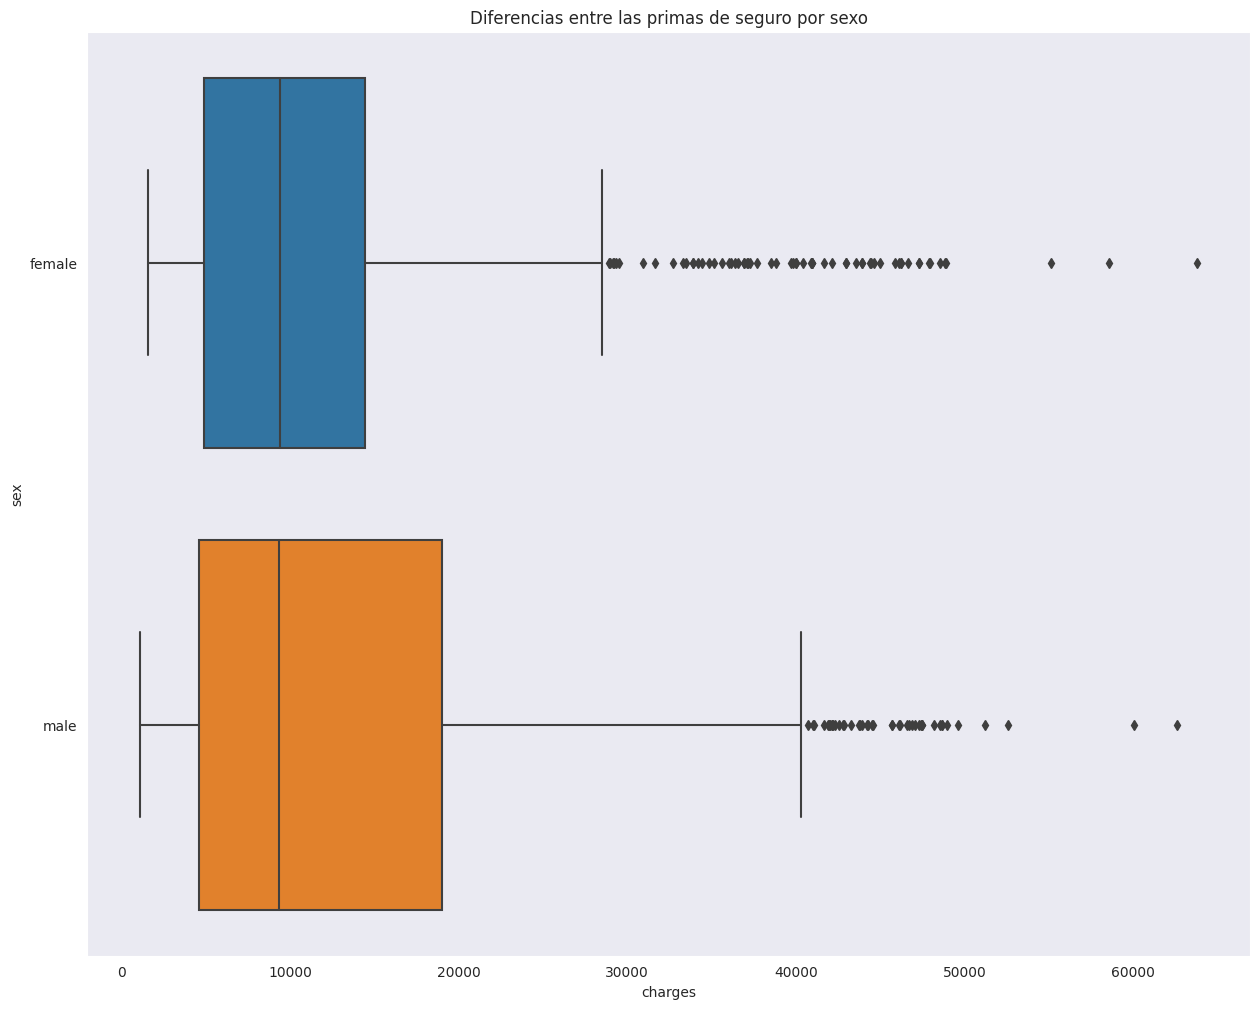

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(y='sex', x='charges', data=insurance_df)
plt.title ('Diferencias entre las primas de seguro por sexo')

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

<Axes: xlabel='charges', ylabel='bmi'>

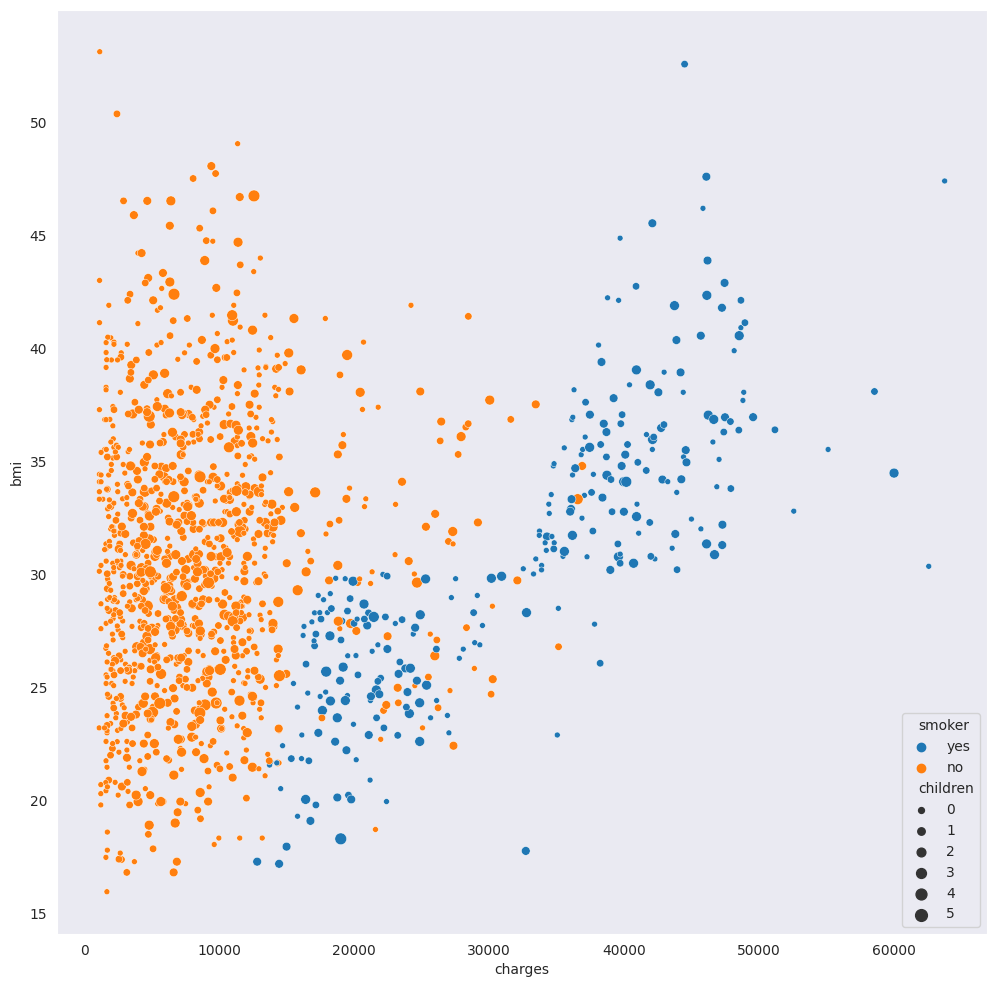

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=insurance_df, x = 'charges', y ='bmi', size='children',hue='smoker')

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<Axes: >

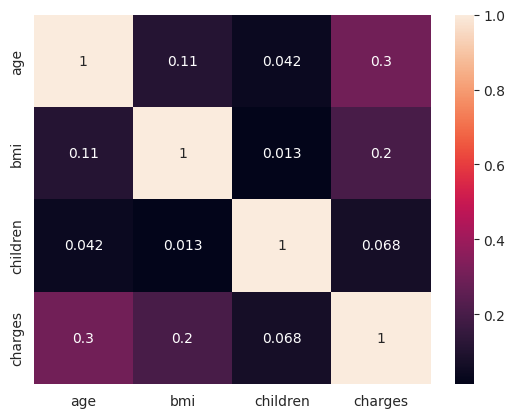

In [ ]:
sns.heatmap(insurance_df.corr(numeric_only=True), annot=True)

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [ ]:
def analize_outliers(df, columna):
  percentile_25 = df[columna].quantile(0.25)
  percentile_75 = df[columna].quantile(0.75)
  iqr = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * iqr
  lower_limit = percentile_25 - 1.5 * iqr

  outliers = df[(df[columna] < lower_limit) | (df[columna] > upper_limit)]

  return outliers


outlier_df = analize_outliers(insurance_df, "charges")
outlier_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,139.0,41.079137,13.801420,18.00000,30.00000,43.0000,52.500000,64.00000
bmi,139.0,35.564604,4.434917,22.89500,32.66750,35.2000,37.660000,52.58000
children,139.0,1.187050,1.126546,0.00000,0.00000,1.0000,2.000000,4.00000
charges,139.0,42103.947206,5582.168107,34617.84065,37786.14995,40974.1649,45786.706425,63770.42801


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [ ]:
female_count = outlier_df['sex'].value_counts()['female']
porcentage_female = female_count*100/len(outlier_df)
porcentage_male = 100.0 - porcentage_female
print(f'El porcentage de mujeres es: {porcentage_female:.3f}')
print(f'El porcentage de hombres es: {porcentage_male:.3f}')

El porcentage de mujeres es: 35.971
El porcentage de hombres es: 64.029


In [ ]:
smoker_count = outlier_df['smoker'].value_counts()['yes']
porcentage_smoker = smoker_count*100/len(outlier_df)
porcentage_no_smoker = 100.0 - porcentage_smoker
print(f'El porcentage de fumadores es: {porcentage_smoker:.3f}')
print(f'El porcentage de no fumadores es: {porcentage_no_smoker:.3f}')

El porcentage de fumadores es: 97.842
El porcentage de no fumadores es: 2.158


4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=insurance_df['smoker'],random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer

cat_pipeline = make_pipeline(
    OneHotEncoder(drop='first', sparse_output=False))

num_pipeline = make_pipeline(MinMaxScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)

final_predictions_y = lr_model.predict(Xtest)

lin_rmse = mean_squared_error(ytest, final_predictions_y, squared=False)
print(f'La RMSE para el modelo 1 es de {lin_rmse:.5f}')

r2_model = r2_score(ytest, final_predictions_y)
print(f'La R2 para el modelo 1 es de {r2_model:.5f}')

La RMSE para el modelo 1 es de 5698.75978
La R2 para el modelo 1 es de 0.75385


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [ ]:
ytrain

42       6272.477200
847      2438.055200
625      3736.464700
394      9411.005000
621     35861.965119
            ...     
56      13607.368750
599     33471.971890
36      15612.193350
1179    19350.368900
597      5594.845500
Name: charges, Length: 1070, dtype: float64

In [ ]:
def upper_outliers(df):
  percentile_25 = df.quantile(0.25)
  percentile_75 = df.quantile(0.75)
  iqr = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * iqr

  print(upper_limit)

  df.loc[df > upper_limit] = upper_limit

  return df

ytrain= upper_outliers(ytrain)
ytest = upper_outliers(ytest)

35861.965118750006
29500.9952375


In [ ]:
def upper_outliers(df, columna):
  percentile_25 = df[columna].quantile(0.25)
  percentile_75 = df[columna].quantile(0.75)
  iqr = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * iqr

  print(upper_limit)
  df.loc[df[columna] > upper_limit, columna] = upper_limit

  return df[columna]

y_outliers = upper_outliers(insurance_df, 'charges')

#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_outliers, test_size=0.2, stratify=insurance_df['smoker'],random_state=1)

lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain)

final_predictions_y = lr_model2.predict(Xtest)

lin_rmse = mean_squared_error(ytest, final_predictions_y, squared=False)
print(f'La RMSE para el modelo 2 es de {lin_rmse:.5f}')

r2_model = r2_score(ytest, final_predictions_y)
print(f'La R2 para el modelo 2 es de {r2_model:.5f}')

34489.350562499996
La RMSE para el modelo 2 es de 4483.28388
La R2 para el modelo 2 es de 0.73479


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
# New preprocessing2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = make_pipeline(OrdinalEncoder())

num_pipeline = make_pipeline(StandardScaler())

preprocessing2 = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
])

lr_model3 = make_pipeline(preprocessing2, LinearRegression())
lr_model3.fit(Xtrain, ytrain)

final_predictions_y = lr_model3.predict(Xtest)

lin_rmse = mean_squared_error(ytest, final_predictions_y, squared=False)
print(f'La RMSE para el modelo 3 es de {lin_rmse:.5f}')

r2_model = r2_score(ytest, final_predictions_y)
print(f'La R2 para el modelo 3 es de {r2_model:.5f}')

La RMSE para el modelo 3 es de 4479.05295
La R2 para el modelo 3 es de 0.73530


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2, include_bias=False) ,LinearRegression())
lr_model4.fit(Xtrain, ytrain)

final_predictions_y = lr_model4.predict(Xtest)

lin_rmse = mean_squared_error(ytest, final_predictions_y, squared=False)
print(f'La RMSE para el modelo 4 es de {lin_rmse:.5f}')

r2_model = r2_score(ytest, final_predictions_y)
print(f'La R2 para el modelo 4 es de {r2_model:.5f}')

La RMSE para el modelo 4 es de 4177.26521
La R2 para el modelo 4 es de 0.76976
